<center><h1> Finanzas Computacionales </h1></center>
<center><h3> Universidad Externado de Colombia - Prof. Jhon Moreno </h3></center>
<br>
<br>
<center><h2> Notas de Clase </h2></center>
<center><h3> Miguel Angel Manrique Rodriguez </h3></center>
<center><h3> 2022-1S </h3></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn import preprocessing
from sklearn.cluster import KMeans

sns.set_theme(font="Times New Roman",font_scale=1)

In [2]:
def load_data(symbols,start,end,plot):
    # Carga de datos

    data = pd.DataFrame({})
    for symbol in symbols:
        data_temp = yf.download(symbol, start=start, end=end,progress=False)
        data_temp = data_temp[['Adj Close']]
        data_temp = np.log(data_temp['Adj Close']) - np.log(data_temp['Adj Close'].shift(1))
        data_temp = data_temp.dropna()
        
        data = pd.concat([data,data_temp], axis=1)
        
    data.columns = symbols
    
    if plot==True:
        data.plot(figsize=(10,7))
        if len(symbols) > 3:
            plt.legend(loc='center right', bbox_to_anchor=(1,1),
                        fancybox=True, shadow=True, ncol=5)
        plt.title("logarithmic return", loc="left", fontdict = {'fontsize':18})
        plt.show()
    return data

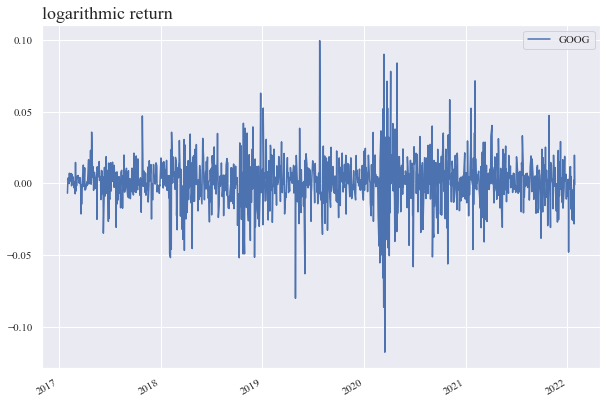

In [3]:
symbols = ["GOOG"]
data = load_data(symbols=symbols, start='2017-01-30', end='2022-01-28',plot=True)

# Retorno de los precios

Los retornos de los precios se dicen variables aleatorias continuas $\rightarrow [-\infty, \infty]$

## Funciones de densidad de probabilidad 

Una función de densidad de probabilidad se define como $f_{x}(x)$

Para calcular la probabilidad de que $X$ se encuentre entre un intervalo $ [a,b] $ $\mathbb{P}[a\leq X\leq b]$, calculamos la integral de $F_{x}(x)$ en ese intervalo

$$
\mathbb{P}[a\leq X\leq b] = \int_{a}^{b}f_{x}(x) dx
$$

<Figure size 720x504 with 0 Axes>

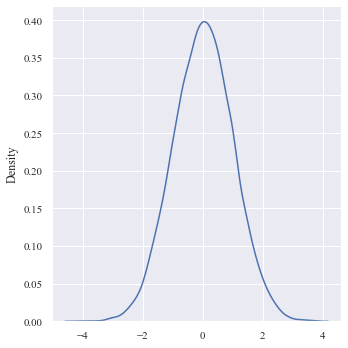

In [4]:
normal = np.random.normal(0,1,10000)
figure = plt.figure(figsize=(10,7))
sns.displot(normal, kind="kde")
plt.show()

## Funciones de distribución acumulada de probabilidad 
Un función de distribución acumulada de probabilidad se define como $F_{x}(x)$, dónde $ F_{x}(x):= \mathbb{P} [X\leq x] $
$$
\mathbb{P} [X\leq x] = \int_{-\infty}^{x}f_{x}(x)dx
$$

$$
f_{x}(x) = \frac{dF_{x}(x)}{dx}
$$

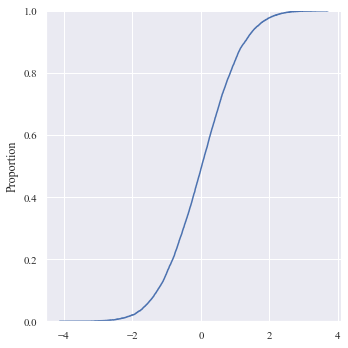

In [5]:
sns.displot(normal, kind="ecdf")
plt.show()

$\lim_{x\rightarrow -\infty} =0$ y $\lim_{x\rightarrow \infty} =1$ 

## Percentiles

$X_{q}:= inf\{x:q\leq F_{x}(x)\}$ el $q\%$ de los datos se encuentra en ese intervalo 

<Figure size 432x288 with 0 Axes>

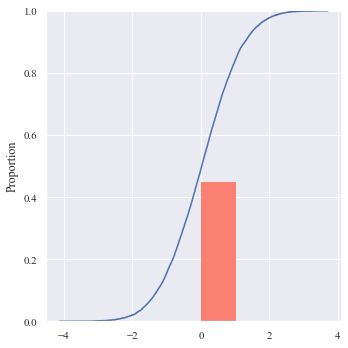

In [6]:
fig= plt.figure()
sns.displot(normal, kind="ecdf")
plt.fill_between(x=[0,1],y1=[0.45,0.45],color="salmon")
plt.show()

## Distribuciones multivariadas

Dadas dos V.A continuas $X$ y $Y$ se define como la "distribución conjunta" de estas variables

\begin{align}
f_{X,Y} (x,y) &:= \mathbb{P}[X \leq x, Y \leq y] \\
          & = \int_{-\infty}^{x}\int_{-\infty}^{y} f_{x,y}(x,y)dydx
\end{align}


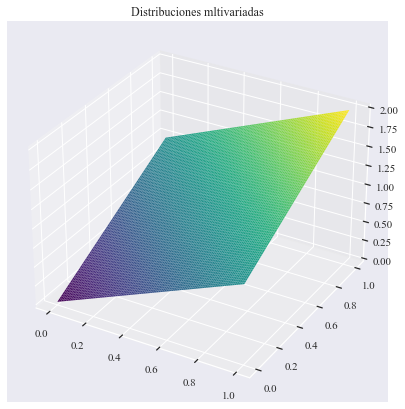

In [7]:
# si f_xy = x + y; 0 <= x <= 1; 0<= y <= 1
# %matplotlib inline

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X, Y = np.meshgrid(x, y)
Z = X+Y
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Distribuciones mltivariadas');
plt.show()

## Densidades marginales

para hallar la densidad de $X$ y $Y$ de la función de densidad conjunta $f_{X,Y}(X,y)$ debemos integrarla con respecto a cada V.A, por ejemplo, para hallar la densidad de $X$ se haya integrando la conjunta con respecto a Y

\begin{align}
f_{X}(x) &= \int_{-\infty}^{\infty} f_{X,Y}(X,Y) dy\\
f_{Y}(y) &= \int_{-\infty}^{\infty} f_{X,Y}(X,Y) dx\\
\end{align}

Dónde $0 \leq x \leq 1$ & $0 \leq y \leq 1$

## Distribuciones marginales

Dadas dos V.A $X$ y $Y$ continuas se define la densidad condicional de $X$ dado $Y$ como:

\begin{align}
f_{X|Y} &:= \frac{f_{X,Y}(xy)}{f_{Y}(y)} = \frac{x+y}{\frac{1}{2}+y}\\
f_{Y|X} &:= \frac{f_{X,Y}(xy)}{f_{X}(x)} = \frac{x+y}{\frac{1}{2}+x}
\end{align}

## Independencia de variables aleatorias 

Dos V.A $X$ y $Y$ son independientes sii:

\begin{align}
f_{X,Y}(x,y) &:= f_{x}(x)f_{y}(y)\\
E[X,Y] & = E[X]E[Y]\\
       & = \mu_{X} \mu_{Y}
\end{align}

# Modelos de volatilidad

## Momentos de una variable Aleatoria

Dado una variable aleatoria V.A $X$ con densidad $f_{X}(X)$ se define su valor esperado

\begin{align}
E[X] = \mu_{x} = \int_{-∞}^{∞} xf_{x}(x)dx
\end{align}

Tal que $X$ es una V.A continua; entonces:

El momento de orden $n$ con $n=1,2,3,...$ de $X$, sedefine como


\begin{align}
E[X^{n}] = \int_{-∞}^{∞} x^{n}f_{x}(x)dx
\end{align}

### El momento central de orden m de una V.A 
\begin{align}
E[(x-\mu_{x})^{n}] = \int_{-∞}^{∞} (x-\mu_{x})^{n}f_{x}(x)dx
\end{align}
 

### Momento de orden 2

Si $n=2$ tenemos la varianza de $X$.
\begin{align}
V[X] \equiv \sigma_{x}^{2} = \int_{-∞}^{∞} (x-\mu_{x})^{n}f_{x}(x)dx
\end{align}

Mide la dispersión, y definimos la desviación estandar como

\begin{align}
\sigma_{x} = \sqrt{V[X]}
\end{align}

### Momento de orden 3
Si $n=3$, tenemos que se define el sesgo de x 
\begin{align}
S[X] = E[\frac{(x-\mu_{x})^{3}}{\sigma_{x}^{3}}]
\end{align}

Mide la simetría 

### Momento de orden 4
Si $n=4$, se define la curstósis de $X$

\begin{align}
K[X] = E[\frac{(x-\mu_{x})^{4}}{\sigma_{x}^{4}}]
\end{align}

mide el apuntamiento de $X$

## Estimadores de los momentos

### Estimador del valor esperado de una V.A
\begin{align}
E[X] = \hat{\mu_{x}}=\frac{1}{m}\sum_{i=1}^{m}x_{i}
\end{align}

### Estimador del momento de orden 2 (Varianza)
\begin{align}
\hat{\sigma_{X}^{2}}=\frac{1}{m-1}\sum_{i=1}^{m}(x_{i}-\hat{\mu_{x}})^{2}
\end{align}

### Estimador del momento de orden 3 (sesgo)
\begin{align}
\hat{S}_{x} = \frac{1}{m-1}\frac{1}{\hat{\sigma_{X}^{3}}}\sum_{i=1}^{m}(x_{i}-\hat{\mu_{x}})^{3}
\end{align}

### Estimador del momento de orden 4 (curtósis)
\begin{align}
\hat{S}_{x} = \frac{1}{m-1}\frac{1}{\hat{\sigma_{X}^{4}}}\sum_{i=1}^{m}(x_{i}-\hat{\mu_{x}})^{4}
\end{align}

## Hipótesis de Estacionariedad
Existe invarianza en el tiempo de los momentos estadísticos de la distribución de una V.A


### Estacionariedad estricta
Un proceso aleatorio $\{X_{t}\}$ se dice "estrictamente estacionario" si para cualquier conjunto finito de tiempos $\{t_{1},t_{2},...,t_{k}\}$ y para cualquier intervalo $\tau$, se tiene que la distribución conjunta del proceso $\{X_{t_{1}},X_{t_{2}}, ... , X_{t_{k}}\}$ es la misma que la distribución conjunta del proceso $\{X_{t_{1+\tau}},X_{t_{2+\tau}}, ... , X_{t_{k+\tau}}\}$

### Estacionariedad débil
Un proceso aleatorio $\{X_{t}\}$ se dice "débilmente estacionario" o "estacionario en covarianza" si se cumple que:

  1. Tiene varianza finita $V[X_{t}]\leq \infty$
  2. Su media es constante $E[X_{t}]=\mu$



#### Covarianza
Mide la asociación lineal entre variables

\begin{align}
cov(X,Y) = E[(X-\mu_{X})(Y-\mu_{Y})]
\end{align}

Propiedades de la covarianza

\begin{align}
cov(X,Y) &= E[(X-\mu_{x})(Y-\mu_{y})]\\
cov(\alpha X+\beta; \theta Y +\delta) &= \alpha \theta cov(X,Y)
\end{align}

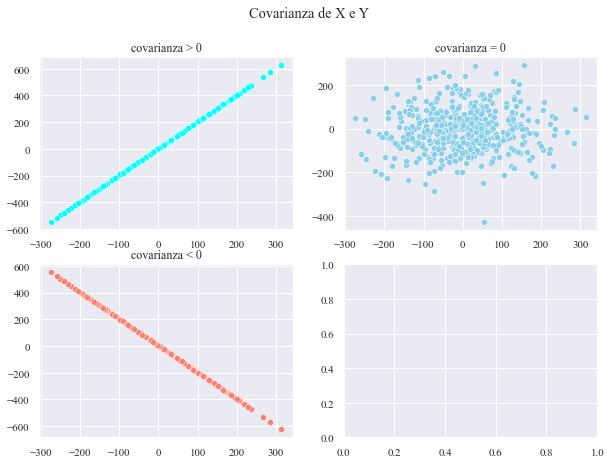

In [8]:
from IPython.core.pylabtools import figsize
X = np.random.normal(0,100,500)
Y = 3 + 2*X
Y1 = 3 - 2*X
Y2 = np.random.normal(0,100,500)

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Covarianza de X e Y')
sns.scatterplot(ax=axes[0,0],x=X,y=Y,color="cyan")
axes[0,0].set_title("covarianza > 0")
sns.scatterplot(ax=axes[1,0],x=X,y=Y1,color="salmon")
axes[1,0].set_title("covarianza < 0")
sns.scatterplot(ax=axes[0,1],x=X,y=Y2,color="skyblue")
axes[0,1].set_title("covarianza = 0")
plt.show()

#### Estimador de la covarianza 
\begin{align}
\hat{Cov(X,Y)} = \frac{1}{m-1}\sum_{i=1}^{m}(x_{i}-\hat{\mu_{x}})(y_{i}-\hat{\mu_{y}})
\end{align}

### Covarianza y coeficiente de correlación

In [9]:
X = np.array([1,2,3])
Y = np.array([2,4,7])
vcov = np.cov(X,Y)
vcov

array([[1.        , 2.5       ],
       [2.5       , 6.33333333]])

### Coeficiente de correlación de Pearson 

El coeficiente de correlación de Pearson $\rho$ se define como
\begin{align}
\rho &= \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

tal que $-1 \leq \rho(X,Y) \leq 1$


In [10]:
corr = np.corrcoef(X,Y)
corr

array([[1.        , 0.99339927],
       [0.99339927, 1.        ]])

### Autocovarianza 
Dado un proceso aleatorio $\{X_{t}\}$ y dos instantes de timepo $s$ y $t$ con $s< t$ se define su función de autocovarianza 

\begin{align}
\gamma_{X}(s,t) &:= Cov(X_{s},X_{t})\\
\gamma_{X}(h) &= cov(X_{t},X_{t+h})
\end{align}

$\gamma_{X}(h)$ se define como la autocovarianza con rezago $h$ tal que $h=0,+-1, +-2, ...$


#### Propiedades de la autocovarianza 
1. $\gamma_{X}(0) = cov(X_{t},X_{t}) = V(X_{t}) \geq 0$
2. $\gamma_{X}(h) = \gamma_{x}(-h) \quad \text{para todo h}$

## Volatilidad histórica

In [11]:
data = pd.read_csv('./datasets/GOOG.csv')
data.set_index('Date', inplace=True, drop = True)

datos = data.drop(['Volume'], axis=1)
datos['Retorno_log'] = np.log((datos['Adj Close']/datos['Adj Close'].shift(1))).dropna()


<AxesSubplot:xlabel='Date'>

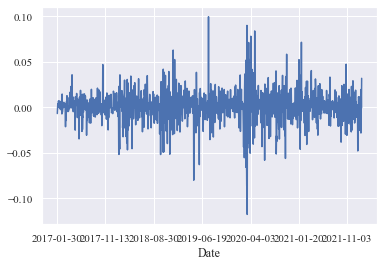

In [12]:
datos['Retorno_log'].plot()

d:\Documents\Miguel\Economia\XI Semestre\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


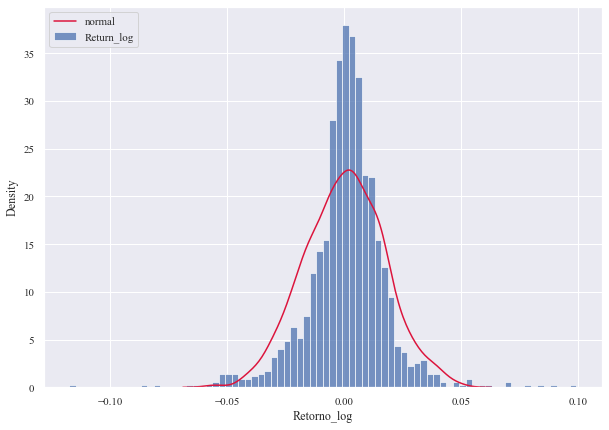

In [21]:
normal = np.random.normal(0,np.std(datos['Retorno_log']),datos.shape[0])
fig = plt.figure(figsize=(10,7))
sns.histplot(datos['Retorno_log'],kde=False,stat='density',label='Return_log')
sns.distplot(normal, color='crimson', label="normal",hist=False)
plt.legend(loc='upper left')

## Volatilidad histórica

In [16]:
mu = np.mean(datos['Retorno_log'])
sd = np.std(datos['Retorno_log'])
print(f"""
Retorno histórico
-----------------------
{mu}

Volatilidad histórica
-----------------------
{sd}
""")


Retorno histórico
-----------------------
0.0009537316942564679

Volatilidad histórica
-----------------------
0.01712227365466241



## Parkinson

\begin{align}
\hat{\sigma_{p}} = \sqrt{\frac{1}{4ln(2)}\frac{1}{m}\sum_{k=1}^{n}ln(\frac{H_{k}}{L_{k}})^{2}}
\end{align}

In [24]:
c = 1/(4*np.log(2))
sigma_p = np.sqrt(c*np.mean(np.log(datos['High']/datos['Low'])**2))
sigma_p

0.013368863987890705

## Garman - klass

# Clustering o agrupamiento


El objetivo central de las técnicas de agrupamiento es identificar a partir de un conjunto de caracterísitcas potenciales grupos.

## Distancia

Dado un conjunto de datos o características $\{x_{1}, x_{2}, ..., x_{n}\} \in \mathbb{R}^{n}$ una distancia (métrica , norma) sobre este conjunto es una función $d:\mathbb{R}^{n}\times \mathbb{R}^{n}  \rightarrow \mathbb{R}$ y que cumple:

\begin{align*}
    d(x,y) &\geq 0 \quad \forall x,y\\
    d(x,y) &= 0 \quad sii \quad x=y\\
    d(x,y) &= d(y,x) \quad \forall x,y\\
    d(x,y) &\leq d(x,y) + d(z,y) \quad \forall x,y,z
\end{align*}

### Normas Lp:

La distancia entre dos puntos $||x-y||_{p} = (\sum_{i=1}^{n} |x_{i}-y_{i}|^{p})^{1/p} \quad ,p\geq1$

\begin{align*}
    p = 2 &\quad ||x-y||_{2} = (\sum_{i=1}^{n} |x_{i}-y_{i}|^{2})^{1/2} \quad &Euclidia \\
    p = 1 &\quad ||x-y||_{1} = \sum_{i=1}^{n} |x_{i}-y_{i}| \quad &Manhattan\\
\end{align*}

## K-Means
Pasos
 1. Inicialización
 2. Asignación
 3. Actualización

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

data = pd.read_csv('./datasets/GOOG.csv')
data = data[['Adj Close','Volume']]

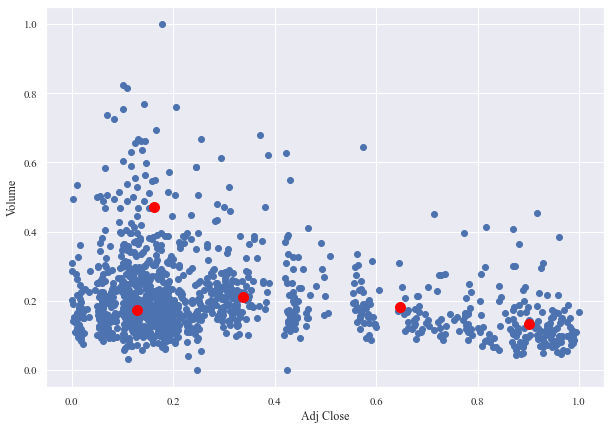

In [41]:
#normalización de los valores

MinMax_scaler = preprocessing.MinMaxScaler()
data_esc = MinMax_scaler.fit_transform(data)
data_esc = pd.DataFrame(data_esc, columns = data.columns)

# implementeación de kmeanso
kmeans = KMeans(n_clusters=5).fit(data_esc)


fig = plt.figure(figsize=(10,7))
plt.scatter(data_esc.iloc[:,0],data_esc.iloc[:,1])
plt.xlabel("Adj Close")
plt.ylabel("Volume")
plt.scatter([i[0] for i in kmeans.cluster_centers_],[i[1] for i in kmeans.cluster_centers_],color='red',s=100)
plt.show()

In [52]:
# kmeans.cluster_centers_[:,0]

array([0.33786746, 0.64738514, 0.12838927, 0.90230841, 0.16168267])

In [42]:
etiquetas = kmeans.predict(data_esc)
data['Cluster'] = etiquetas
data

,Adj Close,Volume,Cluster
0,802.320007,3246600,4
1,796.789978,2160600,2
2,795.695007,2029700,2
3,798.530029,1532100,2
4,801.489990,1463400,2
...,...,...,...
1255,2607.439941,2764600,1
1256,2534.709961,1800400,1
1257,2584.800049,1981500,3
1258,2582.419922,1512400,3


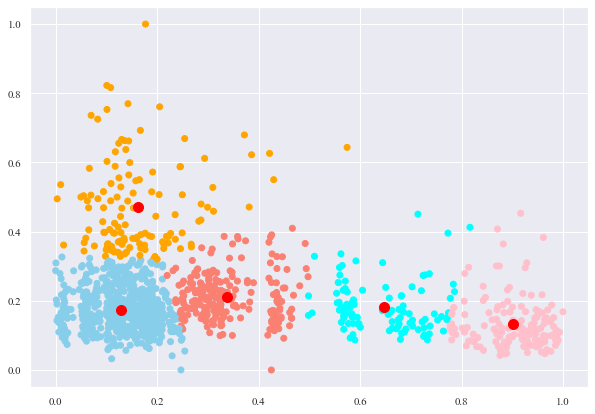

In [45]:
colores = ["salmon","cyan","skyblue","pink","orange"]
asignar = []

for k in etiquetas:
    asignar.append(colores[k])

fig = plt.figure(figsize=(10,7))
plt.scatter(data_esc.iloc[:,0],data_esc.iloc[:,1],color=asignar)
plt.scatter([i[0] for i in kmeans.cluster_centers_],[i[1] for i in kmeans.cluster_centers_],color='red',s=100)
plt.show()

## Buscar en que consiste el método de la silueta y la curva hombro 

## Clustering Jerárquico

### Aditivo 
Parte de que cada observación es una categoría y recursivamente empieza a formar agregaciones de acuerdo a la distancia de las observaciones entre ellas hasta formar un grupo que contiene a todos.

### Divisivo

Parte de un grupo que contiene todas las observacones y recursivamente los va desagregando en grupos más pequeños

Ejemplo:

Se quiere agrupar a un conjunto de estudiantes de acuerdo al puntaje obtenido en un prueba, para eso tenemos:

In [31]:
table = pd.DataFrame({
    'ID': [1,2,3,4,5],
    'Score': [10,7,28,20,35]
})
table

,ID,Score
0,1,10
1,2,7
2,3,28
3,4,20
4,5,35


### Construimos la matriz de proximidad

In [34]:
#tomando la distancia euclidia
def similarity_matrix(table,distance):
    if distance == 'euclidian':
        euclidian = lambda p,q: np.sqrt((p-q)**2)
    n = table.shape[0]
    similarity_matrix = np.zeros((n,n))
    for row in range(table.shape[0]):
        for col in range(table.shape[0]):
            similarity_matrix[row,col] = euclidian(table.iloc[row,1],table.iloc[col,1])
    return similarity_matrix

similarity_matrix(table=table,distance='euclidian')

array([[ 0.,  3., 18., 10., 25.],
       [ 3.,  0., 21., 13., 28.],
       [18., 21.,  0.,  8.,  7.],
       [10., 13.,  8.,  0., 15.],
       [25., 28.,  7., 15.,  0.]])

### Calculamos la matriz de clustering jerárquico aditivo

In [3]:
# def aditive_cluster(table):
#     table = np.asarray(table)
#     n = len(table)
#     table1 = np.zeros((n-1))
#     # row = range(table.shape[0]-1)[0]
#     while n != 1:
#         for  row  in  range(table.shape[0]-1):
#             if row == 0:
#                 table1[row] = table[row] + table[row+1]
#             else:
#                 table1[row] = table[row+1]
#             print(table,"\n","\n",table1)
#             table = np.concatenate((
#                 np.ones((n-1)),
#                 table1.reshape(-1)
#             ),axis=0)
#     return table1    

In [4]:
# aditive = aditive_cluster(table=table)
# aditive

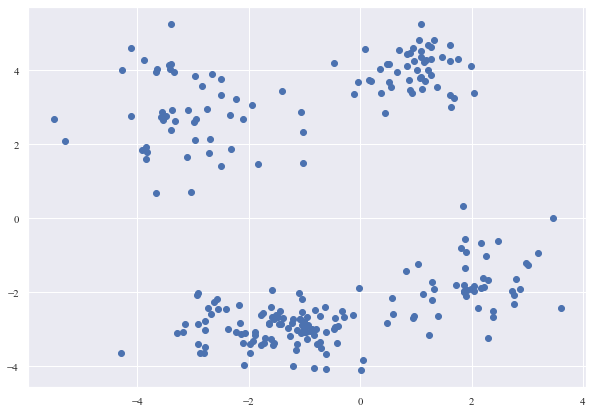

In [16]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage,dendrogram

data = pd.read_excel('./datasets/Cluster.xlsx')
x = data['X1'].values
y = data['X2'].values

fig = plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.show()

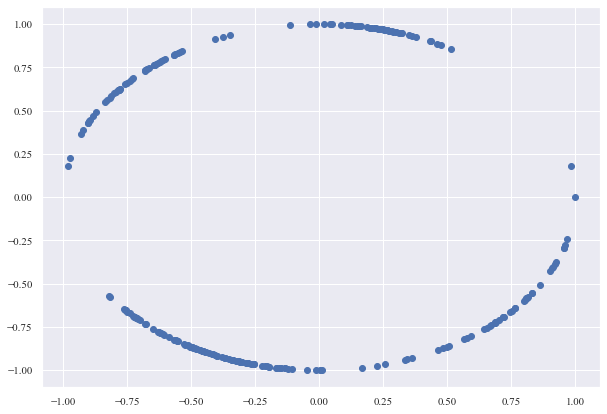

In [30]:
ds = normalize(data)
ds = pd.DataFrame(ds,columns=data.columns)

# MinMax_scaler = preprocessing.MinMaxScaler()
# ds = MinMax_scaler.fit_transform(data)
# ds = pd.DataFrame(ds,columns=data.columns)

x = ds['X1'].values
y = ds['X2'].values

fig = plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.show()

### Dendograma y agrupamiento

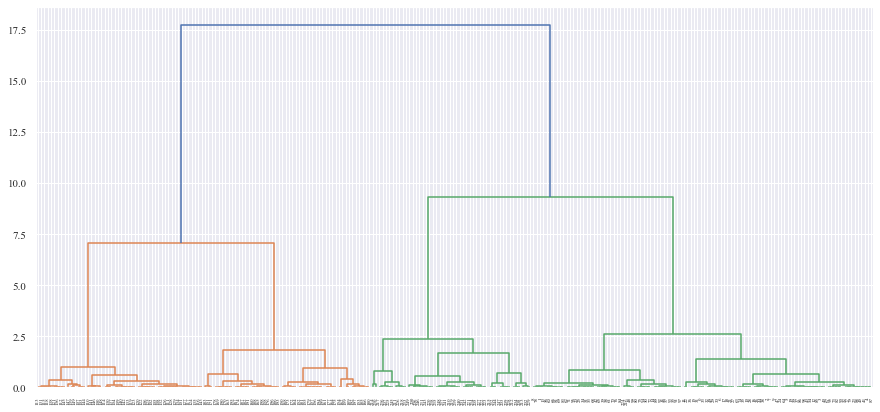

In [29]:
fig = plt.figure(figsize=(15,7))
den = dendrogram(linkage(ds,method='ward'))

In [42]:
from sklearn.cluster import AgglomerativeClustering
AgglomerativeClustering()
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
cluster.fit(ds)

AgglomerativeClustering(n_clusters=4)

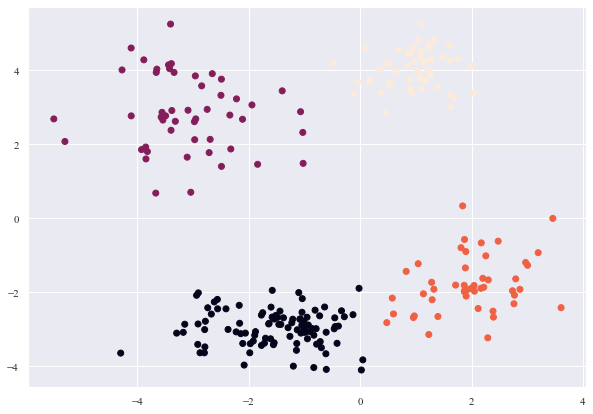

In [43]:
fig = plt.figure(figsize=(10,7))
plt.scatter(data['X1'],data['X2'], c = cluster.labels_)
plt.show()

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
data = pd.read_csv('./datasets/GOOG.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True,drop=True)

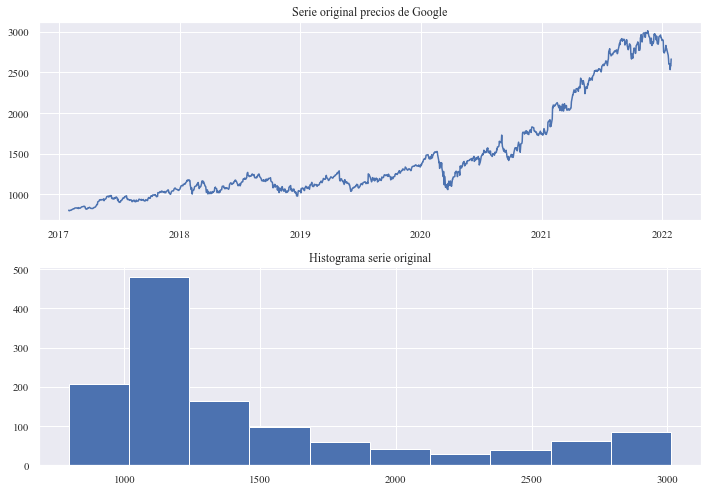

In [42]:
fig, axes = plt.subplots(2,figsize=(10,7),sharey=False)

axes[0].plot(data['Adj Close'])
axes[0].set_title('Serie original precios de Google')
axes[1].hist(data['Adj Close'])
axes[1].set_title('Histograma serie original')

fig.tight_layout()
plt.show()

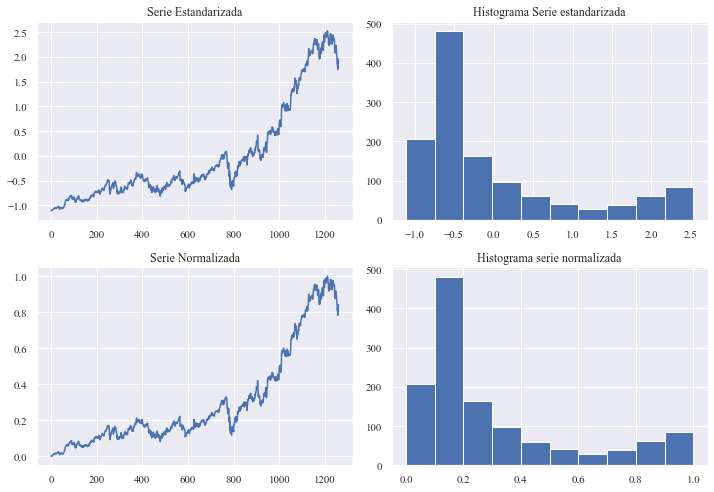

In [40]:
ss = StandardScaler()
data_estan = ss.fit_transform(data[['Adj Close']])

nn = MinMaxScaler()
data_norm = nn.fit_transform(data[['Adj Close']])

fig, axes = plt.subplots(2,2,figsize=(10,7))

axes[0,0].plot(data_estan)
axes[0,0].set_title('Serie Estandarizada')
axes[0,1].hist(data_estan)
axes[0,1].set_title('Histograma Serie estandarizada')
axes[1,0].plot(data_norm)
axes[1,0].set_title('Serie Normalizada')
axes[1,1].hist(data_norm)
axes[1,1].set_title('Histograma serie normalizada')

fig.tight_layout()
plt.show()

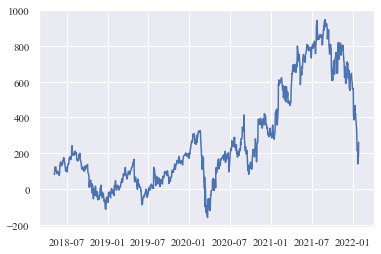

In [51]:
dif = data['Adj Close'] - data['Adj Close'].shift(1)
pct_change = np.log(data['Adj Close']/data['Adj Close'].shift(1))

mma = data['Adj Close'] - data['Adj Close'].rolling(320).mean()

plt.plot(mma)